# My Goal is Predicting Price Volatility: 

As the Model aims to predict price swings (like high-volatility periods), Volume is a crucial factor. High volume often accompanies price movements, especially large swings.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
# The CSV file is in the same folder as this notebook; providing the CSV file name is sufficient.
data_path = "gold2024_07_19.csv"
df =  pd.read_csv(data_path, index_col=0)

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0
3,2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2
4,2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0


In [106]:
df['Date'] = pd.to_datetime(df['Date'])

df[['Open','High','Low', 'Close', 'Adj Close', 'Volume']] = df[['Open','High','Low', 'Close', 'Adj Close', 'Volume']].astype(float)  # Convert all columns to float
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0.0
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0.0
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0.0
3,2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2.0
4,2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0.0


In [107]:
rename_cols = {
    "Adj Close": "Adj_Close",
}
df.rename(columns=rename_cols, inplace=True)

df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0.0
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0.0
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0.0
3,2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2.0
4,2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0.0


In [108]:
df.describe()

,Date,Open,High,Low,Close,Adj_Close,Volume
count,5993,5993.000000,5993.000000,5993.000000,5993.000000,5993.000000,5993.000000
mean,2012-08-17 05:42:09.551142912,1134.055932,1139.698231,1128.151177,1133.988453,1133.988453,4281.945103
min,2000-08-30 00:00:00,255.000000,256.100006,255.000000,255.100006,255.100006,0.000000
25%,2006-09-06 00:00:00,625.500000,627.200012,622.599976,625.400024,625.400024,20.000000
50%,2012-08-16 00:00:00,1227.199951,1233.500000,1222.500000,1227.199951,1227.199951,105.000000
75%,2018-08-06 00:00:00,1582.099976,1592.800049,1571.400024,1582.900024,1582.900024,396.000000
max,2024-07-19 00:00:00,2472.899902,2473.100098,2454.800049,2462.399902,2462.399902,386334.000000
std,NaN,551.119394,554.180601,547.993625,551.119329,551.119329,24371.454043


In [109]:
# The diff() and shift() functions in pandas calculate the difference or shift relative to the previous row. 
# Since there's no row before the first row, you get NaN for the percentage change calculation.
# Here's how to handle the NaN and get a correct Percentage_Change_Close column:

# Calculate Percentage Change, handling the first row (Current_Day_Close - Previous_Day_Close) / Previous_Day_Close
df['Percentage_Change_Close'] = (df['Close'].diff() / df['Close'].shift(1)).fillna(0) #replaces all the NaN values in the Percentage_Change_Close column with 0.

df.head()

#A negative percentage change indicates a decrease in the stock price. A positive percentage change indicates an increase.

,Date,Open,High,Low,Close,Adj_Close,Volume,Percentage_Change_Close
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0.0,0.000000
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0.0,0.016064
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0.0,-0.004671
3,2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2.0,-0.004332
4,2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0.0,-0.005801


In [110]:
df.isnull().sum()

Date                       0
Open                       0
High                       0
Low                        0
Close                      0
Adj_Close                  0
Volume                     0
Percentage_Change_Close    0
dtype: int64

In [111]:
num_data_points = df.shape[0] * df.shape[1]
print(f"Number of data points: {num_data_points}")

Number of data points: 47944


In [115]:
df_drop = df.drop(columns=["Date"])
df_drop

,Open,High,Low,Close,Adj_Close,Volume,Percentage_Change_Close
0,273.899994,273.899994,273.899994,273.899994,273.899994,0.0,0.000000
1,274.799988,278.299988,274.799988,278.299988,278.299988,0.0,0.016064
2,277.000000,277.000000,277.000000,277.000000,277.000000,0.0,-0.004671
3,275.799988,275.799988,275.799988,275.799988,275.799988,2.0,-0.004332
4,274.200012,274.200012,274.200012,274.200012,274.200012,0.0,-0.005801
...,...,...,...,...,...,...,...
5988,2430.000000,2436.000000,2422.899902,2422.899902,2422.899902,540.0,0.003687
5989,2427.399902,2462.399902,2427.399902,2462.399902,2462.399902,93.0,0.016303
5990,2472.899902,2473.100098,2454.800049,2454.800049,2454.800049,10.0,-0.003086
5991,2466.000000,2466.000000,2451.800049,2451.800049,2451.800049,2.0,-0.001222


In [116]:
num_data_points = df_drop.shape[0] * df_drop.shape[1]
print(f"Number of data points: {num_data_points}")

Number of data points: 41951


In [117]:
df_drop.describe()

,Open,High,Low,Close,Adj_Close,Volume,Percentage_Change_Close
count,5993.000000,5993.000000,5993.000000,5993.000000,5993.000000,5993.000000,5993.000000
mean,1134.055932,1139.698231,1128.151177,1133.988453,1133.988453,4281.945103,0.000421
std,551.119394,554.180601,547.993625,551.119329,551.119329,24371.454043,0.010884
min,255.000000,256.100006,255.000000,255.100006,255.100006,0.000000,-0.093538
25%,625.500000,627.200012,622.599976,625.400024,625.400024,20.000000,-0.004763
50%,1227.199951,1233.500000,1222.500000,1227.199951,1227.199951,105.000000,0.000450
75%,1582.099976,1592.800049,1571.400024,1582.900024,1582.900024,396.000000,0.006154
max,2472.899902,2473.100098,2454.800049,2462.399902,2462.399902,386334.000000,0.090277


In [120]:
# filter out outliers
check_outlier = df_drop[
    (df_drop.Close > 0) & (df_drop.Close <= 2462) & 
    (df_drop.Volume >= 0) & (df_drop.Volume <= 386334) & 
    (df_drop.Low >= 0) & (df_drop.Low <= 2454)
]

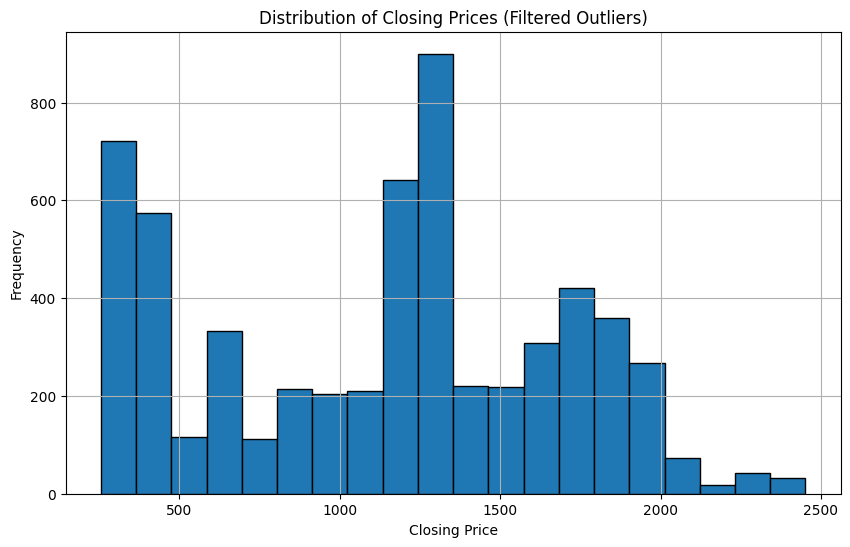

In [121]:
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
plt.hist(check_outlier.Close, bins=20, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Distribution of Closing Prices (Filtered Outliers)')
plt.grid(True)
plt.show()

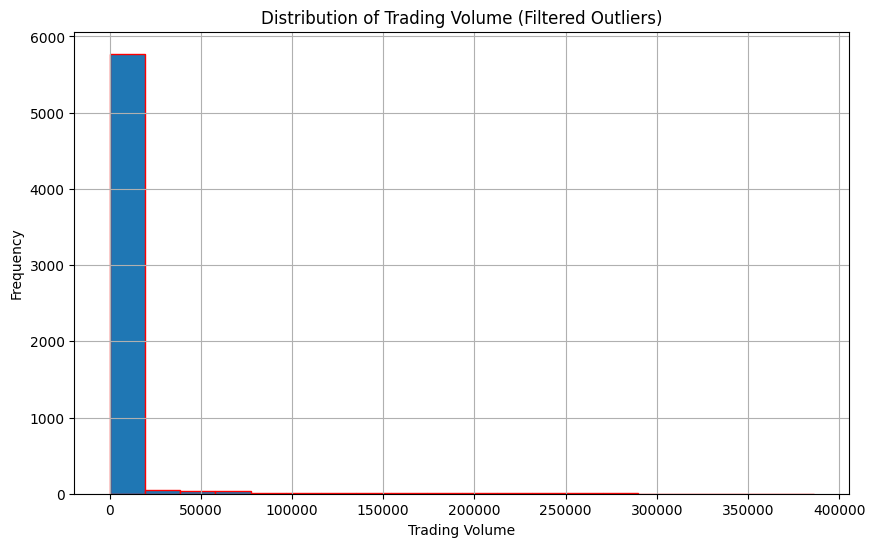

In [122]:
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
plt.hist(check_outlier.Volume, bins=20, edgecolor='red')  # Adjust bins as needed
plt.xlabel('Trading Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Trading Volume (Filtered Outliers)')
plt.grid(True)
plt.show()

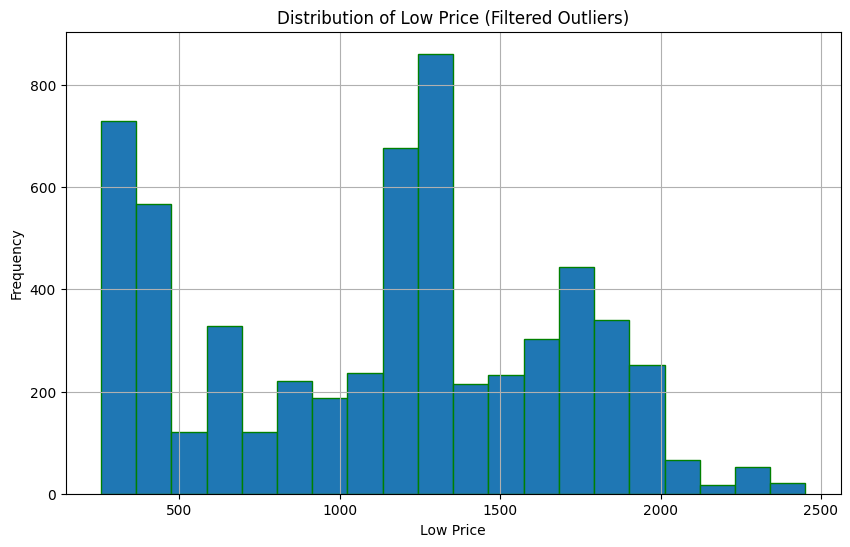

In [123]:
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
plt.hist(check_outlier.Low, bins=20, edgecolor='green')  # Adjust bins as needed
plt.xlabel('Low Price')
plt.ylabel('Frequency')
plt.title('Distribution of Low Price (Filtered Outliers)')
plt.grid(True)
plt.show()

# Key Observations:

- Large Data: There are `47944 data points`, which is a good amount for analysis.
- Price Range: Prices range from a minimum of 255 to a maximum of 2473. This indicates a significant price fluctuation in the underlying stock.
- Volume: Volume ranges from 0 to 386,334. This is a very large range, suggesting potential high volatility and trading activity.

## Skewness:
- Volume: The maximum value in Volume is significantly higher than the 75th percentile. This suggests a positively skewed distribution for Volume, meaning there are likely a lot of small volumes and a few very large volumes.
- Price: The standard deviation (std) is about 500-550 for most price-related columns, suggesting a good amount of variability in those values. The mean, median (50th percentile), and 75th percentile are relatively close, hinting at a more symmetrical distribution for prices.
EDA Insights:
- Outliers: The extremely high Volume values might be outliers, worth investigating further. Are these genuine data points, or could they be errors? Outliers can significantly impact some statistical measures.
- Correlation: The relatively similar means and standard deviations for Open, High, Low, Close, and Adj Close suggest potential correlation among these columns. You should explore correlation matrices or scatter plots to confirm this.
- Volume Impact: The high variability in Volume might be linked to price movements. Investigate how Volume relates to price changes to understand if there's a relationship.
- Visualizations: Create histograms, box plots, and scatter plots for each column to visually understand the distribution of data and potential relationships.

## Next Steps in EDA:
- Handle Outliers: If you decide that Volume outliers are not genuine, you may need to remove or transform them.
- Correlation Analysis: Calculate and visualize correlation coefficients to understand how the different price-related columns are related to each other.
- Time Series Analysis: If the data is time-based (daily, weekly, etc.), analyze the time series behavior to look for trends, seasonality, or auto-correlation.
- Feature Engineering: Explore creating new features based on the relationships you find during EDA.

EDA is an iterative process. I used insights gained from the initial summary to guide further exploration and analysis.

In [124]:
# Perform query for volumes above 100%.
df_check = df.query('Volume > 210')[['Date', 'Open','High','Low', 'Close', 'Adj_Close', 'Volume', 'Percentage_Change_Close']].sort_values(['Date'], ascending=False)
df_check

,Date,Open,High,Low,Close,Adj_Close,Volume,Percentage_Change_Close
5988,2024-07-15,2430.000000,2436.000000,2422.899902,2422.899902,2422.899902,540.0,0.003687
5979,2024-07-01,2323.800049,2329.699951,2321.699951,2327.600098,2327.600098,237.0,-0.000043
5977,2024-06-27,2296.800049,2329.000000,2295.000000,2324.500000,2324.500000,1532.0,0.011004
5976,2024-06-26,2307.899902,2314.399902,2298.000000,2299.199951,2299.199951,986.0,-0.007511
5969,2024-06-14,2307.000000,2331.399902,2305.800049,2331.399902,2331.399902,948.0,0.013564
...,...,...,...,...,...,...,...,...
63,2000-11-30,266.399994,270.200012,266.200012,270.100006,270.100006,810.0,0.013889
62,2000-11-29,269.600006,270.100006,265.799988,266.399994,266.399994,2849.0,-0.012602
61,2000-11-28,269.799988,269.799988,269.799988,269.799988,269.799988,28696.0,-0.001111
20,2000-09-28,277.500000,277.500000,275.100006,275.600006,275.600006,631.0,-0.010057


# Whether Volume is necessary for the analysis. 

While it's true that Volume can provide valuable insights into market sentiment, it depends on the specific goals and the type of analysis one is performing.

**A breakdown to help decide:**

### When Volume IS likely important:
- Predicting Price Volatility: 
If your model aims to predict price swings (like high-volatility periods), Volume can be a crucial factor. High volume often accompanies price movements, especially large swings.

- Market Sentiment: 
If you're trying to understand market sentiment, Volume can offer clues. High volume can suggest strong buying or selling pressure.

- Trading Strategies: 
Some trading strategies rely heavily on Volume analysis. For example, traders might look for high-volume breakouts or high-volume reversals.

### When Volume MAY NOT be needed:
- Predicting Price Direction: 
If your goal is to simply predict whether the price will go up or down (a binary classification problem), Volume might not be the most direct indicator. Price trends themselves can be strong predictors.

- Specific Market Conditions: 
If you're focused on analyzing a specific market or asset class where Volume is less relevant (e.g., some less liquid markets or instruments), it might not be a critical factor.

### Key Considerations:
- Data Availability: 
If you have reliable Volume data for the period you are analyzing, it's worth considering including it in your model.

- Model Complexity: 
Including Volume might add complexity to your model. Assess whether the added complexity will significantly improve your model's performance or if it's unnecessary.

- Feature Engineering: 
You can engineer features based on Volume to make it even more relevant. For example, you could create ratios between Volume and price changes.

### In My Specific Case:
- EDA Summary: 
The EDA indicates a wide range of Volume values, suggesting potential high volatility.

- Model Goal: I haven't explicitly stated the model's goal. If the focus is on predicting price movement, Volume is worth considering.

- Experiment: While unsure, I can try building models with and without Volume to see if it significantly impacts the results.

The best approach is to explore the data and experiment with different models and features to determine what works best for specific analysis.

# Note:

There's no direct, guaranteed relationship between a low "Close" value and high "Volume." 

- Price Doesn't Always Drive Volume: 
While it's true that high volume often accompanies big price changes (especially volatile periods), a low "Close" value alone doesn't guarantee high volume.

- Other Factors: 
Several things can influence volume besides price. News events, company announcements, market sentiment, and even technical indicators can all contribute to high or low trading activity.

- Liquidity: 
A low-priced stock might have low volume simply because it's a less-traded or less liquid asset.

- Volatility: 
Even with a low "Close" value, a stock can have low volume if there isn't significant price movement during the trading day.

## Outlook:
- Correlation Analysis: 
Calculate the correlation coefficient between "Close" and "Volume" to see if there's a statistically significant relationship. This will tell you if there's a tendency for high Volume when prices are low or vice-versa.

- Visualizations: 
Create a scatter plot with "Close" on the X-axis and "Volume" on the Y-axis. This will give you a visual representation of the relationship (if any) and help you identify outliers.

### Example Scenarios:
- High Volume, Low Close: 
This could indicate a sell-off, where a lot of investors are trying to sell the stock at a lower price.

- Low Volume, Low Close: 
This could mean that the stock is relatively inactive, possibly because investors are uncertain about its future or because there isn't a strong catalyst for trading.

- Low Volume, High Close: 
This might indicate a consolidation period, where the stock is trading in a narrow range with limited volume.

### Key Takeaway:
While a low "Close" value can sometimes be associated with high volume (especially during volatile periods), it's not a guaranteed relationship. 

I need to analyze the data using correlation and visualization techniques to understand the actual relationship between price and volume for the specific asset you are studying.

In [126]:
# Correlation Calculation
correlation = df['Close'].corr(df['Volume']) #calculate the Pearson correlation coefficient between "Close" and "Volume."
print(f"Correlation between Close and Volume: {correlation}")

Correlation between Close and Volume: 0.049177336076618526


A `correlation coefficient` of `0.049177336076618526` between `Close` and `Volume` is very close to zero. This indicates that there is a very weak positive correlation between the closing price of the stock and the trading volume.

- Limited Predictive Power: This weak correlation means that knowing the closing price doesn't give much information about what the trading volume will be, and knowing the trading volume doesn't tell you much about where the closing price will go.

Although weak correlation doesn't necessarily mean that "Volume" is unimportant. There might be other, more complex relationships that a simple correlation coefficient doesn't capture.

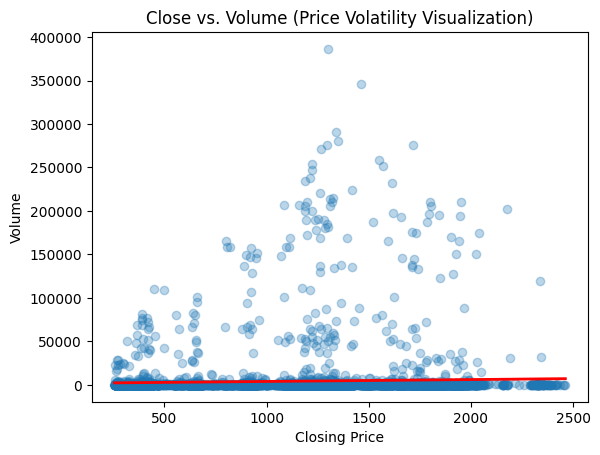

In [128]:
# Scatter Plot with Volume on the Y-axis and a Trendline
sns.regplot(x='Close', y='Volume', data=df,  # Use sns.regplot() for trendline
            scatter_kws={'alpha': 0.3},  # Adjust point transparency
            line_kws={'color': 'red', 'lw': 2})  # Customize trendline color and width
plt.title('Close vs. Volume (Price Volatility Visualization)')
plt.xlabel('Closing Price')
plt.ylabel('Volume')

plt.show()

In [132]:
# Correlation Calculation
correlation = df['Percentage_Change_Close'].corr(df['Volume']) #calculate the Pearson correlation coefficient between "Percentage_Change_Close" and "Volume."
print(f"Correlation between Percentage_Change_Close and Volume: {correlation}")

Correlation between Percentage_Change_Close and Volume: -0.023183152631308764


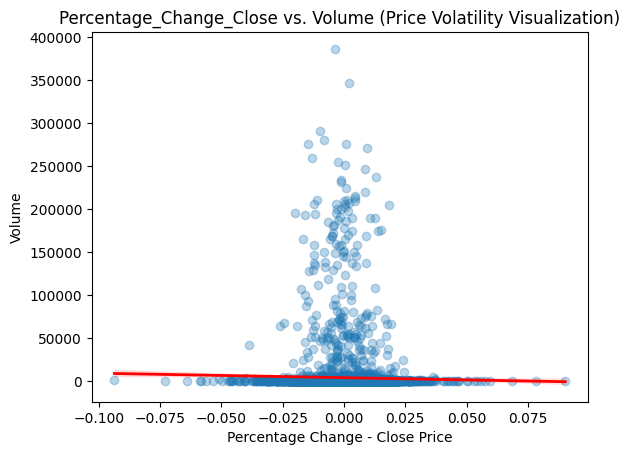

In [131]:
# Scatter Plot with Volume on the Y-axis and a Trendline
sns.regplot(x='Percentage_Change_Close', y='Volume', data=df,  # Use sns.regplot() for trendline
            scatter_kws={'alpha': 0.3},  # Adjust point transparency
            line_kws={'color': 'red', 'lw': 2})  # Customize trendline color and width
plt.title('Percentage_Change_Close vs. Volume (Price Volatility Visualization)')
plt.xlabel('Percentage Change - Close Price')
plt.ylabel('Volume')

plt.show()

A `correlation coefficient` of `-0.023183152631308764` between `Percentage_Change_Close` and `Volume` means that there's a `very weak negative correlation` between the percentage change in the closing price and the trading volume. This indicates that there's practically no linear relationship between these two variables.

- Limited Predictive Power: Knowing the percentage change in the closing price doesn't give much information about what the trading volume will be, and vice versa.

- Negative Direction: Generally, knowing the trading volume doesn't tell you much about whether the price will go up or down

In [138]:
df.tail()

,Date,Open,High,Low,Close,Adj_Close,Volume,Percentage_Change_Close
5988,2024-07-15,2430.000000,2436.000000,2422.899902,2422.899902,2422.899902,540.0,0.003687
5989,2024-07-16,2427.399902,2462.399902,2427.399902,2462.399902,2462.399902,93.0,0.016303
5990,2024-07-17,2472.899902,2473.100098,2454.800049,2454.800049,2454.800049,10.0,-0.003086
5991,2024-07-18,2466.000000,2466.000000,2451.800049,2451.800049,2451.800049,2.0,-0.001222
5992,2024-07-19,2418.800049,2419.199951,2395.500000,2395.500000,2395.500000,2.0,-0.022963


In [139]:
from datetime import datetime

# Get today's date
today = datetime.today().strftime("%Y-%m-%d")

output_path = f'../cleaned_data/gold-cleaned-{today}.csv'  

# Save the DataFrame to CSV
df.to_csv(output_path, index=False)  # Set index=False to avoid saving the row index